In [36]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import warnings
warnings.simplefilter("ignore")

In [37]:
# Setting up some parameters for the workbook

pd.set_option('display.max_rows', 500)
pd.options.display.max_columns = None

%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (25,5)

In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
folder_path = '/content/drive/MyDrive/Stroke_Prediction/'

In [40]:
data = pd.read_csv(folder_path + 'stroke_data.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [42]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [43]:
data.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


In [44]:
data['bmi'].fillna(data['bmi'].mean(), inplace=True)

In [45]:
data.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0


In [46]:
print(data[data.duplicated()])

Empty DataFrame
Columns: [id, gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, stroke]
Index: []


In [47]:
data.drop(['id'], axis=1, inplace=True)

In [48]:
data = data[data['gender'] != 'Other']

In [49]:
data['smoking_status'] = data['smoking_status'].replace('Unknown', 'not smokes')

In [50]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


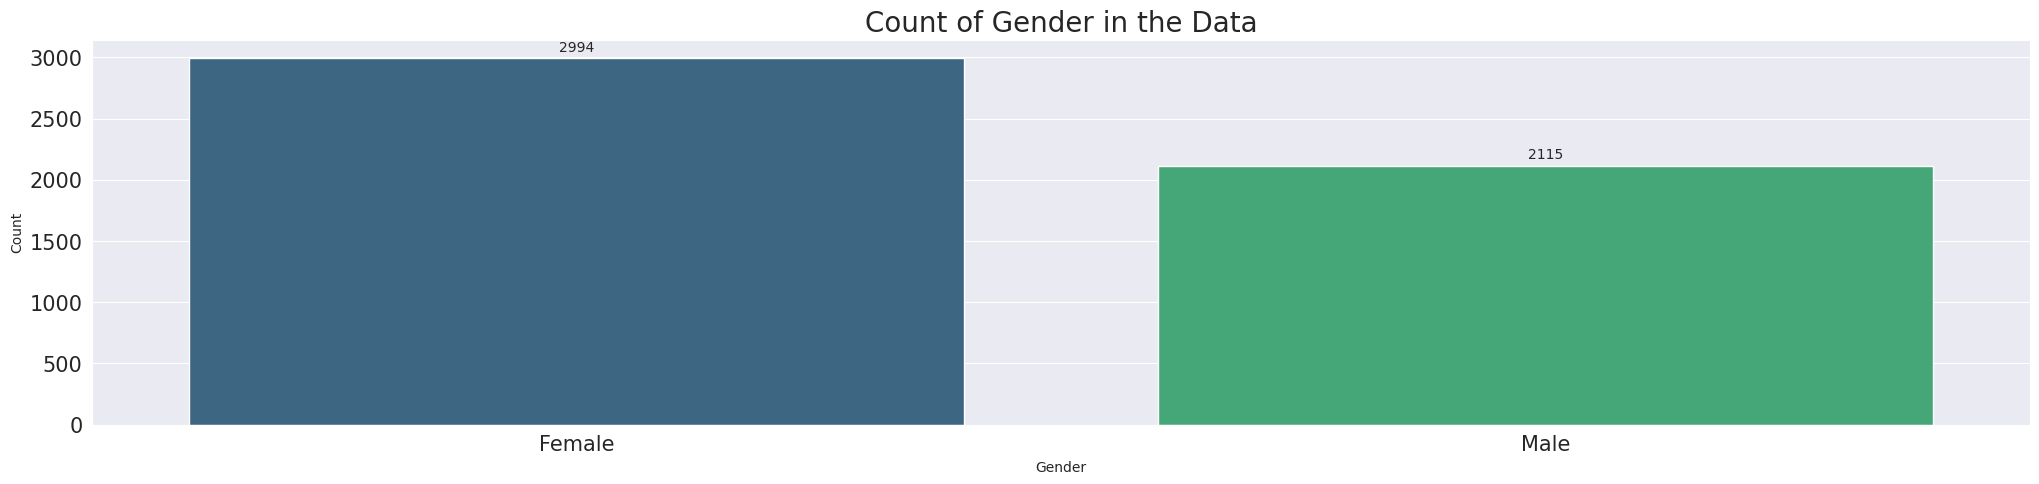

In [51]:
sns.set_style(style="darkgrid")

gender = data['gender'].value_counts().reset_index()
gender.columns  = ['gender', 'count']

fig, axes = plt.subplots(1, 1, sharey=True)

sns.barplot(data=gender, x="gender", y="count", palette='viridis', ax=axes)

for i, row in gender.iterrows():
  axes.annotate(f"{row['count']}", (i, row['count']), textcoords="offset points", xytext=(0, 5), ha="center", fontsize=10)

plt.tick_params(labelsize = 15)
plt.title("Count of Gender in the Data", fontsize=20)
plt.xlabel("Gender", fontsize=10)
plt.ylabel("Count", fontsize=10)
plt.show()

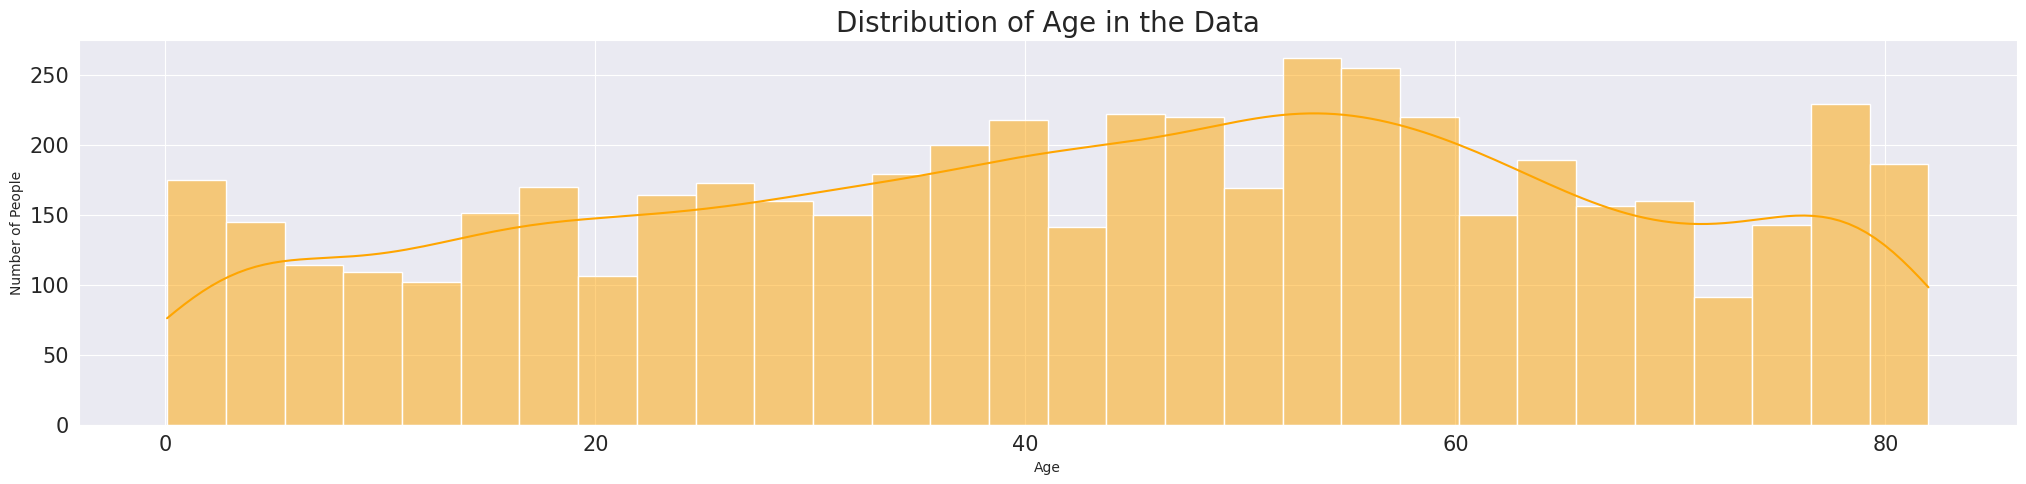

In [52]:
sns.set_style("darkgrid")

fig, axes = plt.subplots(1, 1, sharey=True)

sns.histplot(data=data, x='age',kde=True, bins=30, color='orange', ax=axes)

plt.tick_params(labelsize = 15)
plt.title("Distribution of Age in the Data", fontsize=20)
plt.xlabel("Age", fontsize=10)
plt.ylabel("Number of People", fontsize=10)

plt.show()

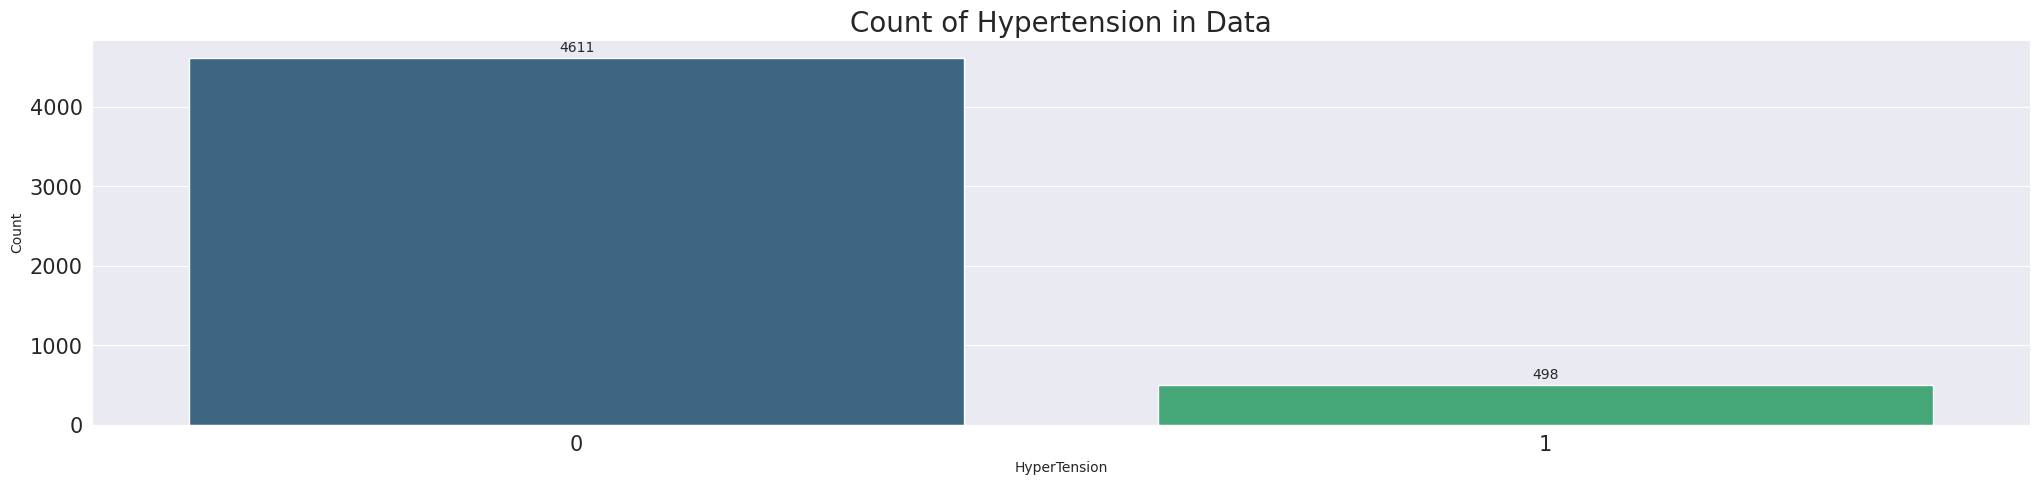

In [53]:
sns.set_style("darkgrid")

hypertension = data['hypertension'].value_counts().reset_index()
hypertension.columns = ['hypertension', 'count']

fig, axes = plt.subplots(1, 1, sharey=True)

sns.barplot(data=hypertension, x='hypertension', y='count', palette='viridis', ax=axes)

for i, row in hypertension.iterrows():
  axes.annotate(f"{row['count']}", (i, row['count']), textcoords="offset points", xytext=(0, 5), ha="center", fontsize=10)

plt.tick_params(labelsize=15)
plt.title("Count of Hypertension in Data", fontsize=20)
plt.xlabel("HyperTension", fontsize=10)
plt.ylabel("Count", fontsize=10)

plt.show()

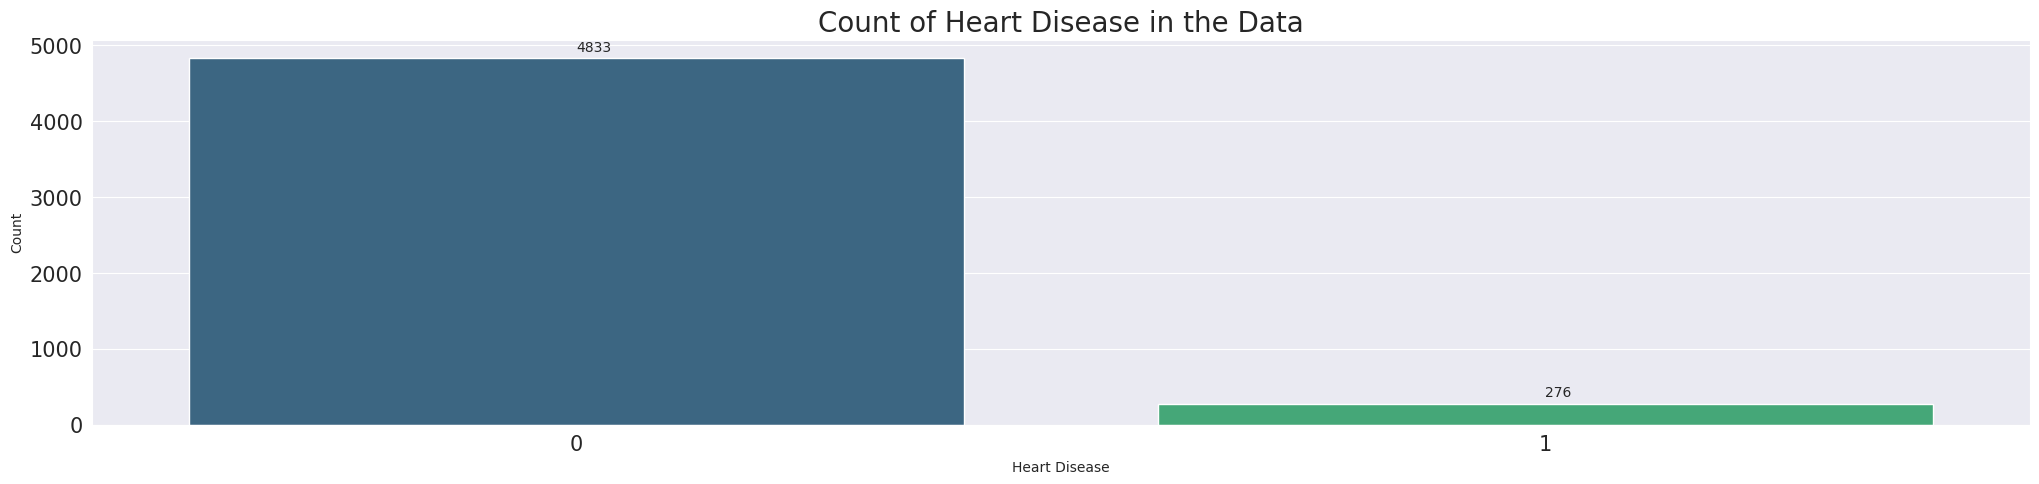

In [54]:
sns.set_style("darkgrid")

h_disease = data['heart_disease'].value_counts().reset_index()
h_disease.columns = ['heart_disease', 'count']

fig, axes = plt.subplots(1, 1, sharey=True)

sns.barplot(data=h_disease, x='heart_disease', y='count', palette='viridis', ax=axes)

for i, row in h_disease.iterrows():
  axes.annotate(f"{row['count']}", (i, row['count']), textcoords="offset points", xytext=(0, 5), fontsize=10)

plt.tick_params(labelsize=15)
plt.title("Count of Heart Disease in the Data", fontsize=20)
plt.xlabel("Heart Disease", fontsize=10)
plt.ylabel("Count", fontsize=10)

plt.show()

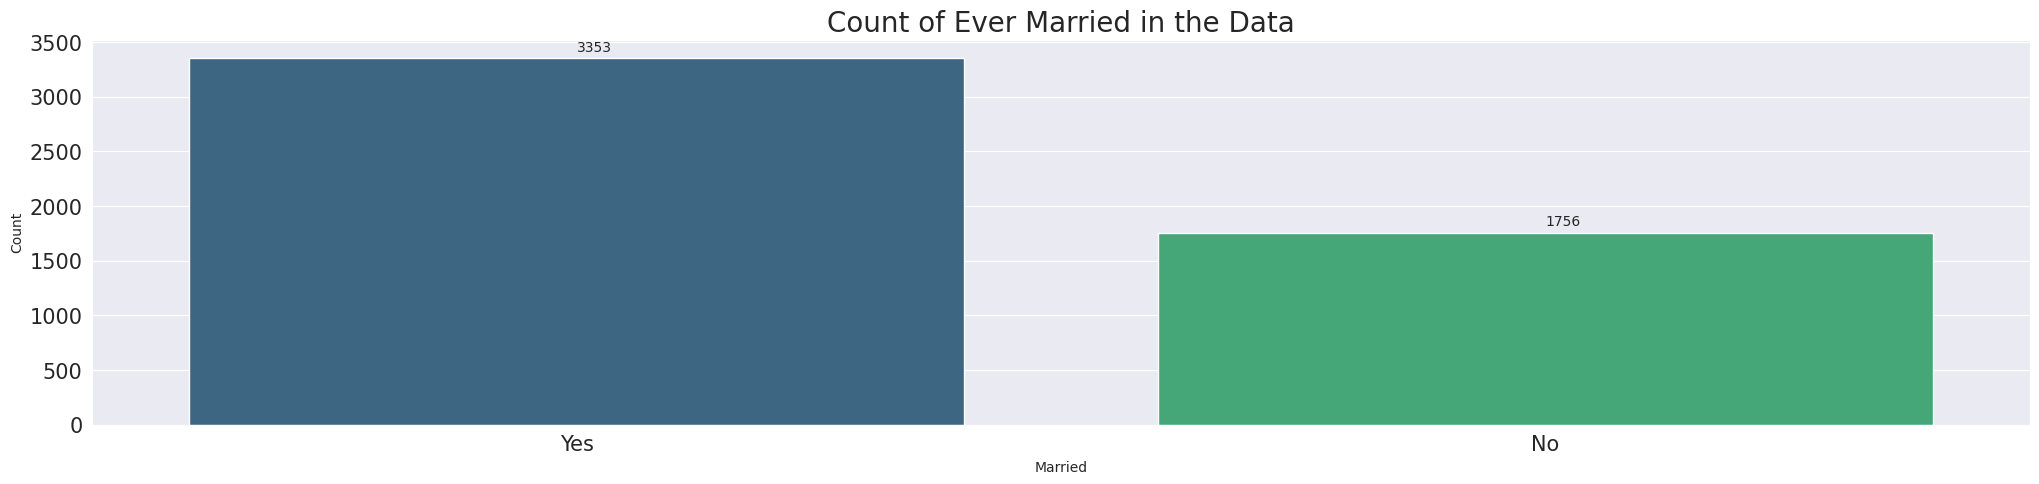

In [55]:
sns.set_style("darkgrid")

h_disease = data['ever_married'].value_counts().reset_index()
h_disease.columns = ['ever_married', 'count']

fig, axes = plt.subplots(1, 1, sharey=True)

sns.barplot(data=h_disease, x='ever_married', y='count', palette='viridis', ax=axes)

for i, row in h_disease.iterrows():
  axes.annotate(f"{row['count']}", (i, row['count']), textcoords="offset points", xytext=(0, 5), fontsize=10)

plt.tick_params(labelsize=15)
plt.title("Count of Ever Married in the Data", fontsize=20)
plt.xlabel("Married", fontsize=10)
plt.ylabel("Count", fontsize=10)

plt.show()

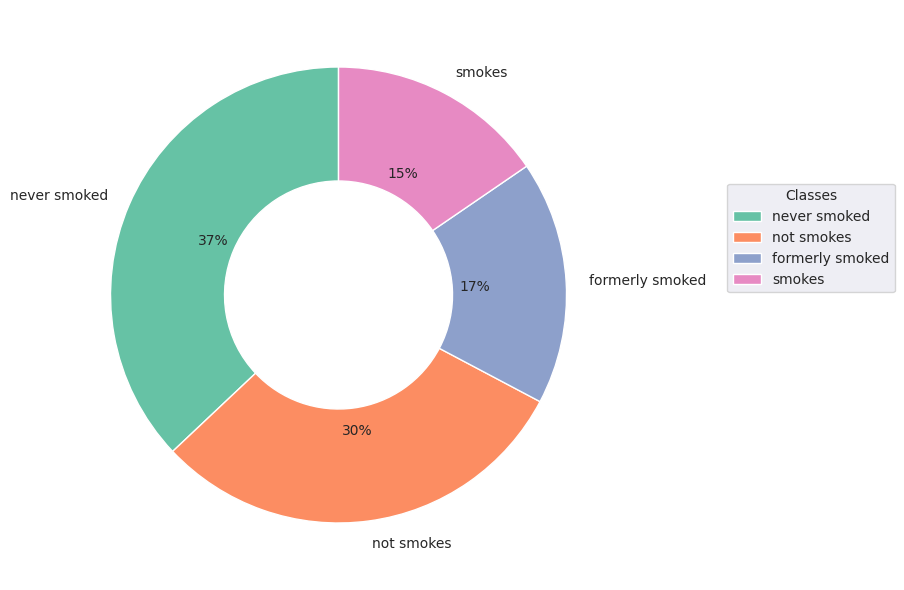

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

smoke_counts = data['smoking_status'].value_counts()
colors = sns.color_palette("Set2")

fig, ax = plt.subplots(figsize=(8, 6))

wedges, texts, autotexts = ax.pie(
    smoke_counts,
    labels=smoke_counts.index,
    colors=colors,
    startangle=90,
    autopct='%.0f%%',
    wedgeprops=dict(width=0.5)
)

ax.legend(
    wedges,
    smoke_counts.index,
    title="Classes",
    loc="center left",
    bbox_to_anchor=(1.17, 0.6),
    frameon=True
)

ax.set(aspect="equal")

plt.tight_layout()
plt.show()


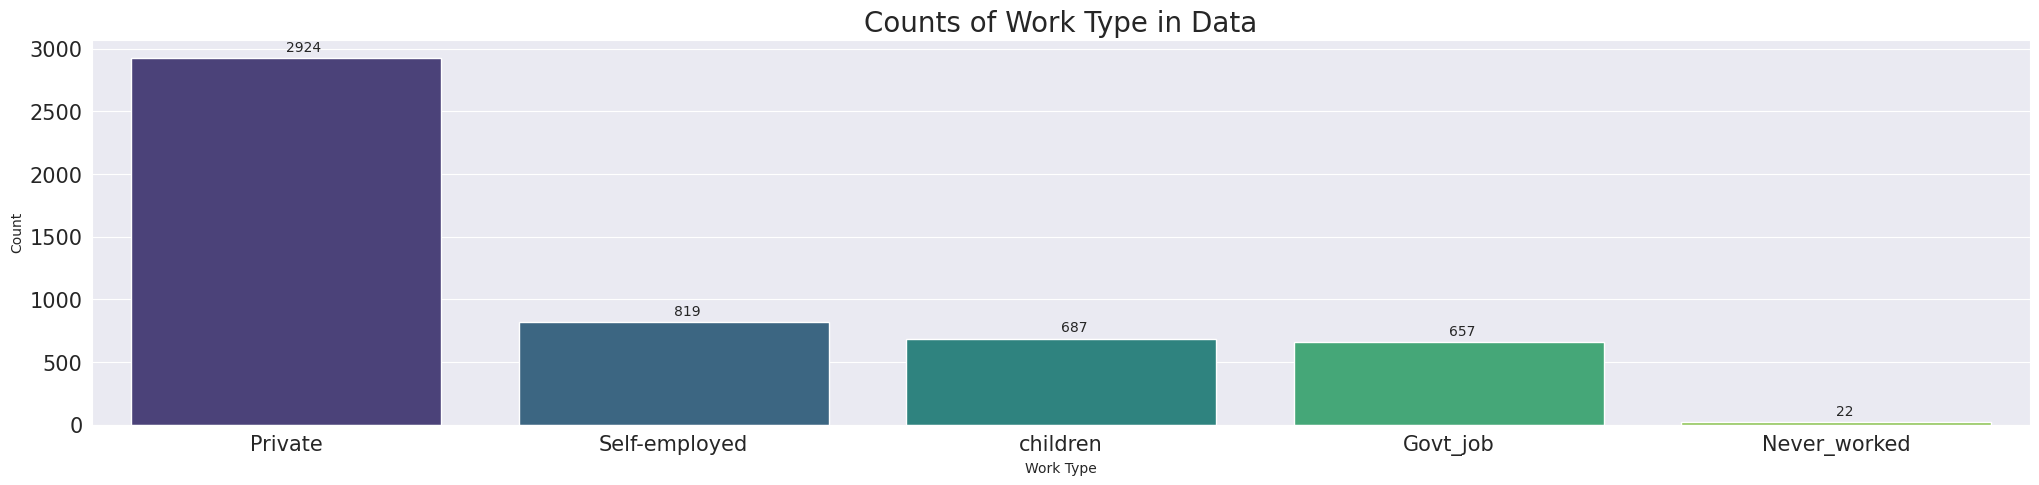

In [57]:
sns.set_style("darkgrid")

work_type = data['work_type'].value_counts().reset_index()
work_type.columns = ['work_type', 'count']

fig, axes = plt.subplots(1, 1, sharey=True)

sns.barplot(data=work_type, x=work_type['work_type'], y=work_type['count'], palette='viridis', ax=axes)

for i, row in work_type.iterrows():
  axes.annotate(f"{row['count']}", (i, row['count']), textcoords="offset points", xytext=(0, 5), fontsize=10)

plt.tick_params(labelsize=15)
plt.title("Counts of Work Type in Data", fontsize=20)
plt.xlabel("Work Type", fontsize=10)
plt.ylabel("Count", fontsize=10)
plt.show()

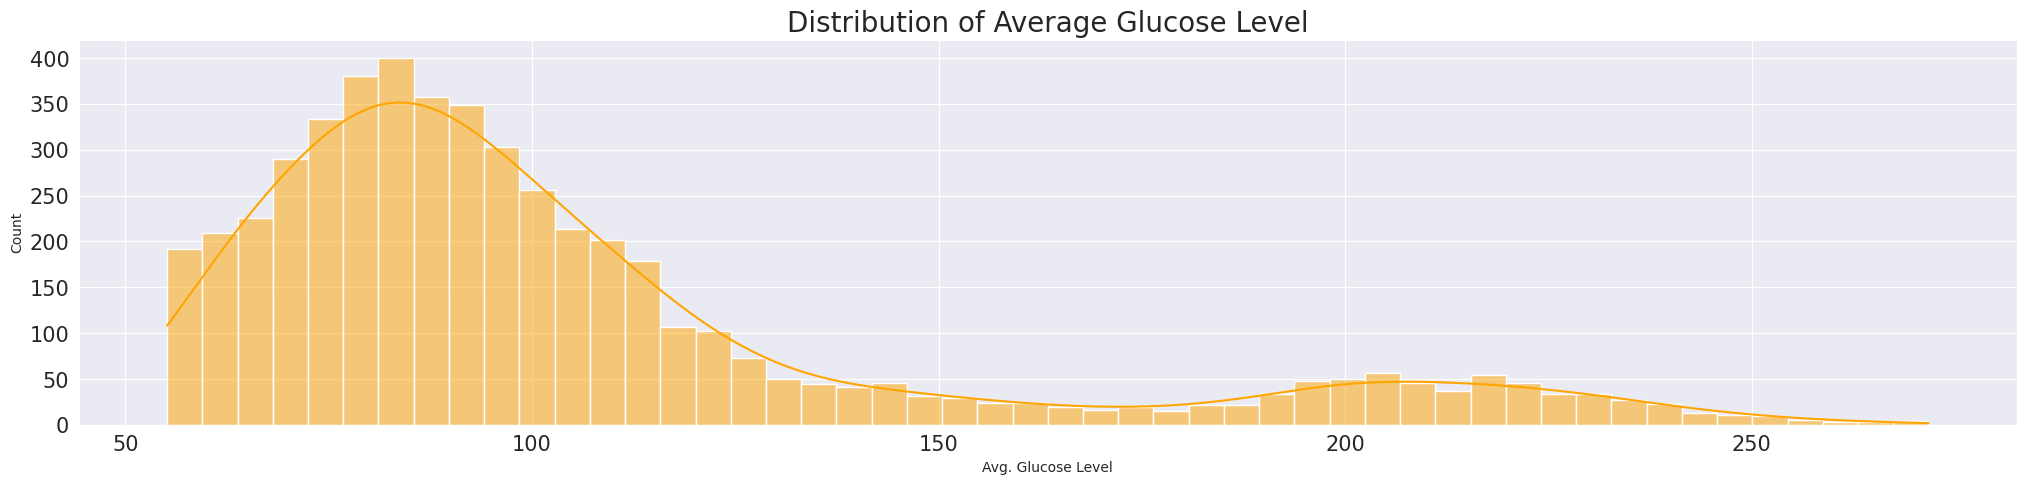

In [58]:
sns.set_style("darkgrid")

fig, axes = plt.subplots(1, 1, sharey=True)

sns.histplot(data=data['avg_glucose_level'], kde=True, bins=50, color="orange", ax=axes)

plt.tick_params(labelsize=15)
plt.title("Distribution of Average Glucose Level", fontsize=20)
plt.xlabel("Avg. Glucose Level", fontsize=10)
plt.ylabel("Count", fontsize=10)
plt.show()


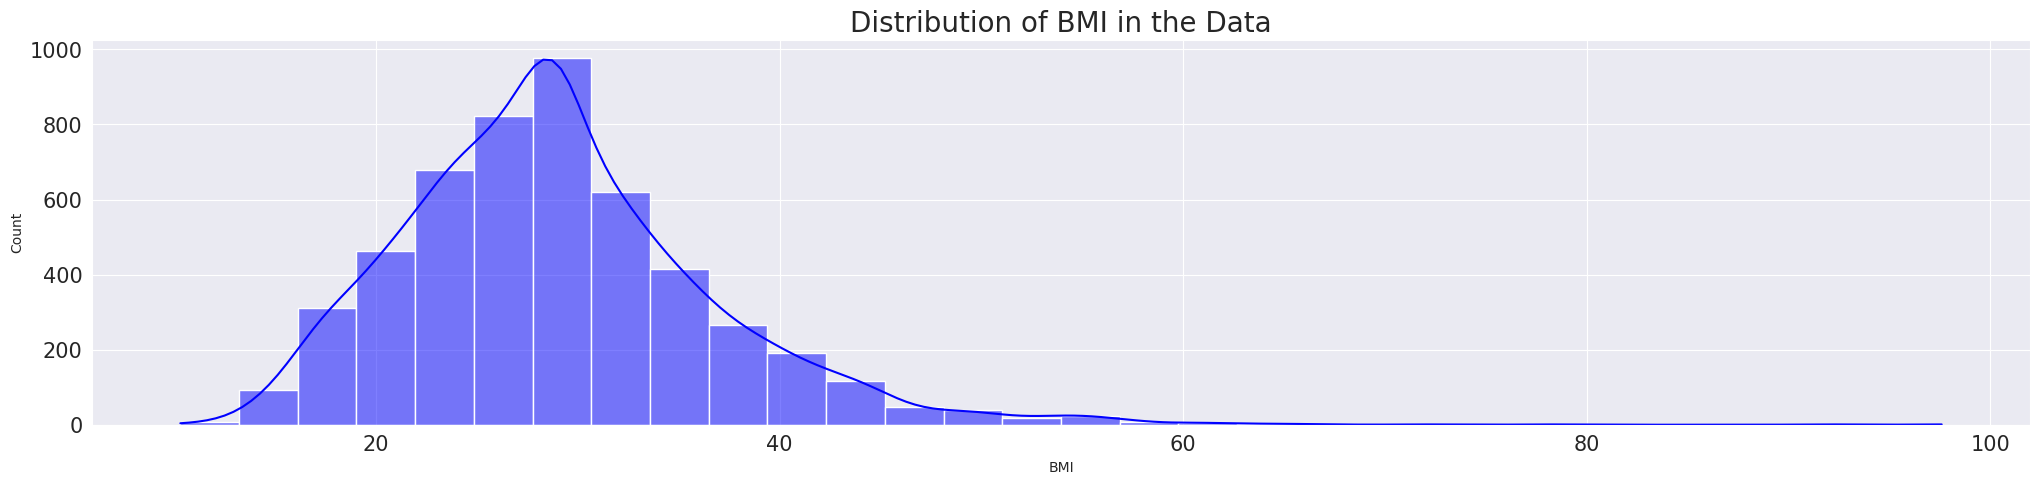

In [59]:
sns.set_style("darkgrid")

fig, axes = plt.subplots(1, 1, sharey=True)

sns.histplot(data=data['bmi'], kde=True, bins=30, color="blue", ax=axes)

plt.tick_params(labelsize=15)
plt.title("Distribution of BMI in the Data", fontsize=20)
plt.xlabel("BMI", fontsize=10)
plt.ylabel("Count", fontsize=10)
plt.show()

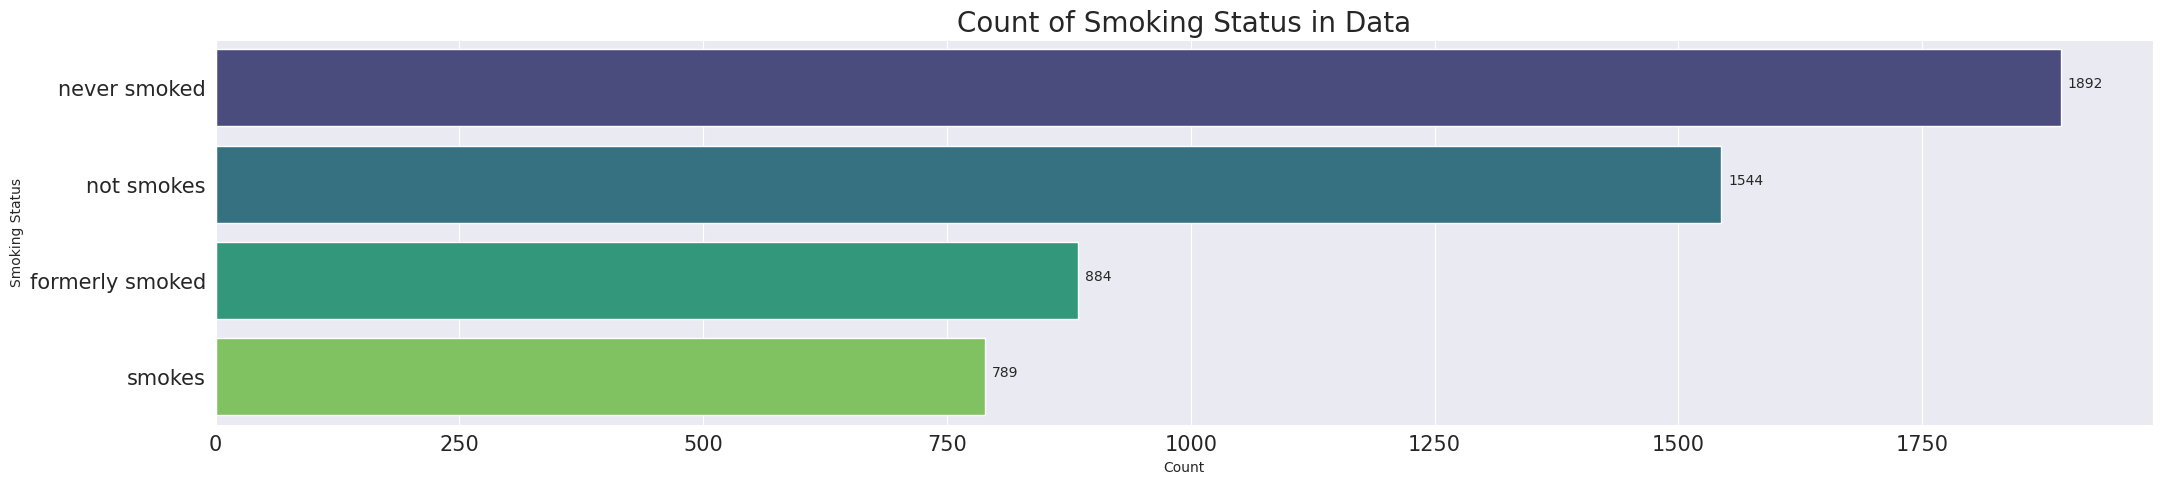

In [60]:
sns.set_style("darkgrid")

s_status = data['smoking_status'].value_counts().reset_index()
s_status.columns = ['smoking_status', 'count']

fig, axes = plt.subplots(1, 1, sharey=True)

sns.barplot(data=s_status, x=s_status['count'], y=s_status['smoking_status'], palette="viridis", ax=axes)

for i, row in s_status.iterrows():
  axes.annotate(f"{row['count']}", (row['count'], i), textcoords="offset points", xytext = (5, 0), fontsize=10)

plt.tick_params(labelsize=15)
plt.title("Count of Smoking Status in Data", fontsize=20)
plt.xlabel("Count", fontsize=10)
plt.ylabel("Smoking Status", fontsize=10)
plt.show()

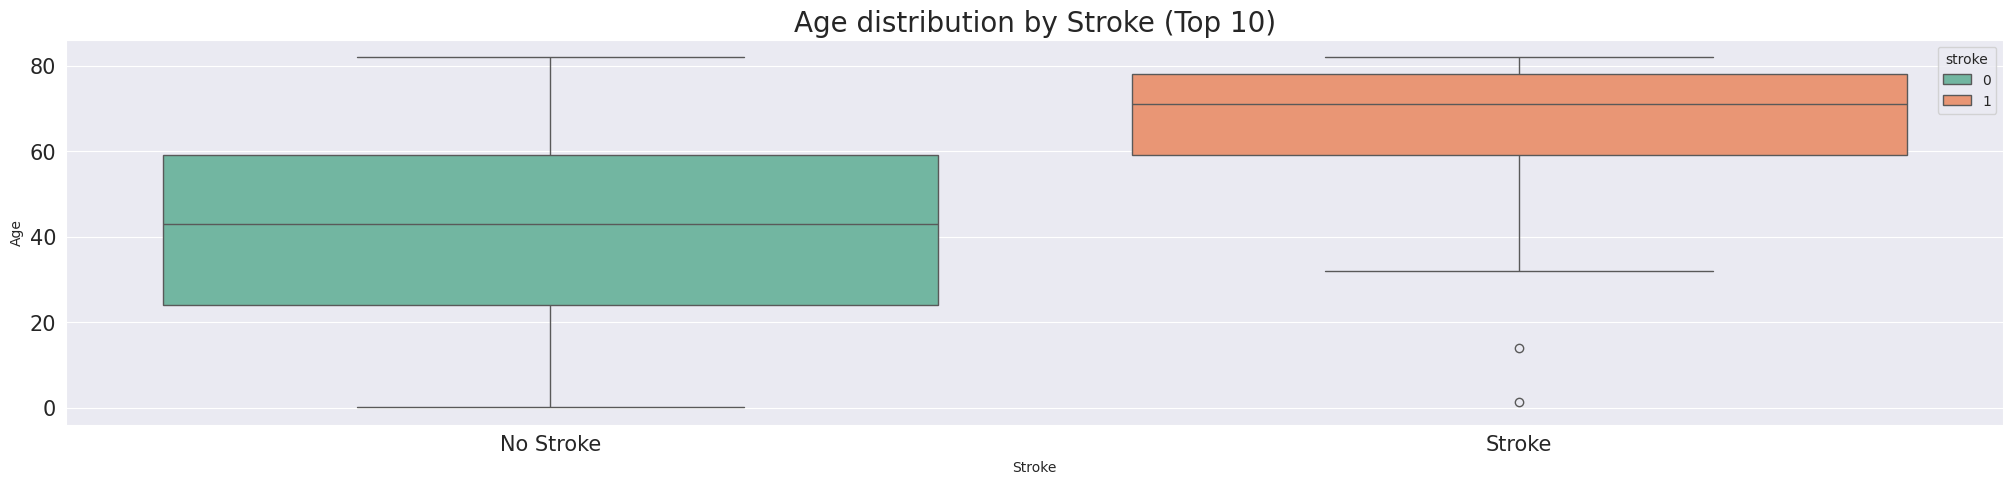

In [61]:
sns.set_style('darkgrid')

fig, axes = plt.subplots(1, 1, sharey=True)

sns.boxplot(data=data, x="stroke", y="age", hue="stroke", palette="Set2", ax=axes)

plt.tick_params(labelsize=15)
plt.title("Age distribution by Stroke (Top 10)", fontsize=20)
plt.xlabel("Stroke", fontsize=10)
plt.ylabel("Age", fontsize=10)
plt.xticks([0, 1], ['No Stroke', 'Stroke'])

plt.show()

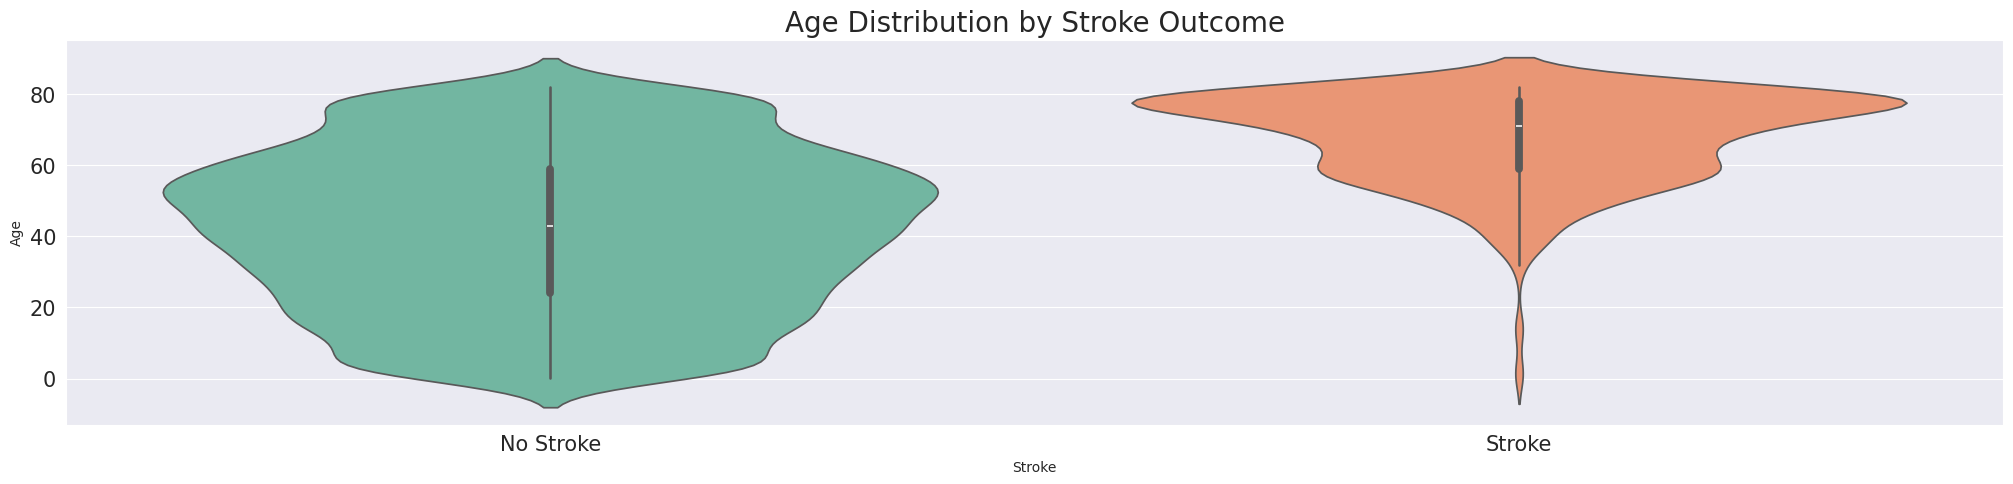

In [62]:
sns.set_style("darkgrid")

fig, axes = plt.subplots(1, 1, sharey=True)

sns.violinplot(data=data, x="stroke", y="age", palette="Set2", ax=axes)

plt.tick_params(labelsize=15)
plt.title("Age Distribution by Stroke Outcome", fontsize=20)
plt.xlabel("Stroke", fontsize=10)
plt.ylabel("Age", fontsize=10)
plt.xticks([0,1], ["No Stroke", "Stroke"])

plt.show()


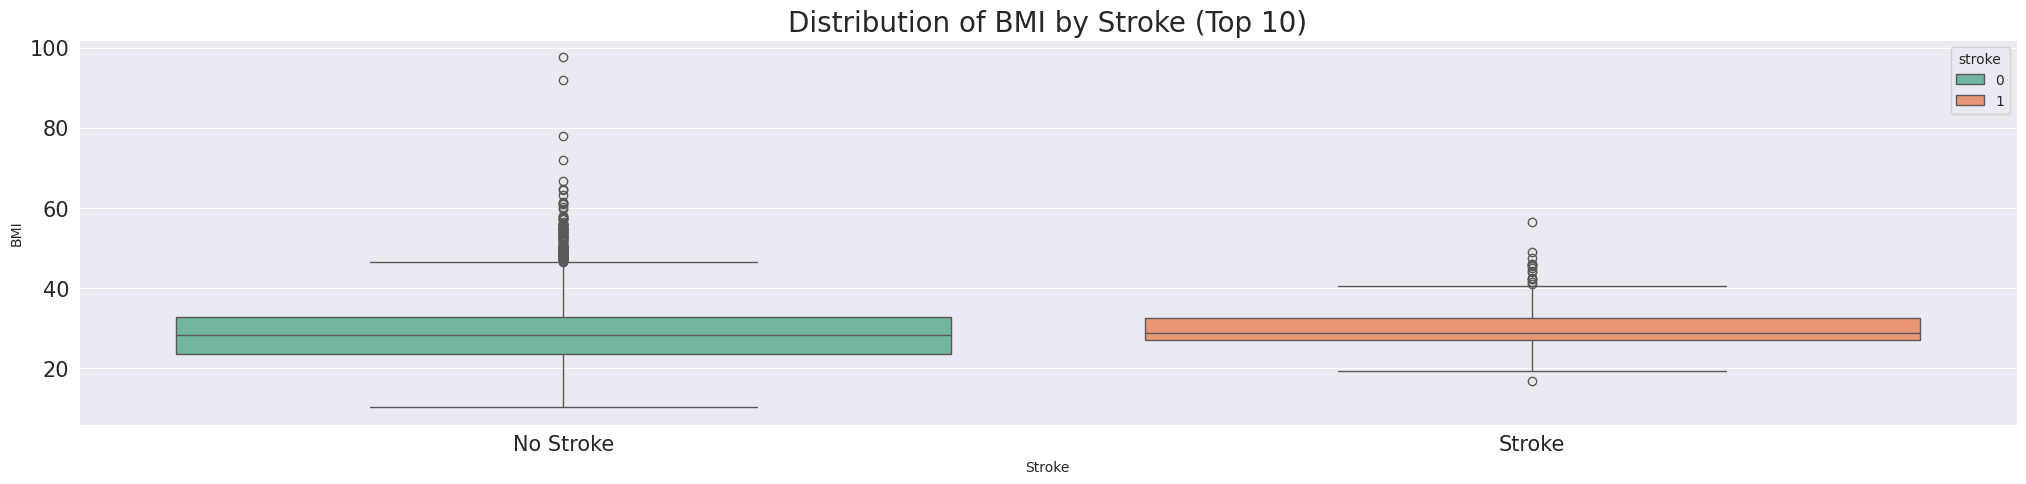

In [63]:
sns.set_style("darkgrid")

fig, axes = plt.subplots(1, 1, sharey=True)

sns.boxplot(data=data, x="stroke", y="bmi", hue="stroke", palette="Set2", ax=axes)

plt.tick_params(labelsize=15)
plt.title("Distribution of BMI by Stroke (Top 10)", fontsize=20)
plt.xlabel("Stroke", fontsize=10)
plt.ylabel("BMI", fontsize=10)
plt.xticks([0, 1], ['No Stroke', 'Stroke'])

plt.show()

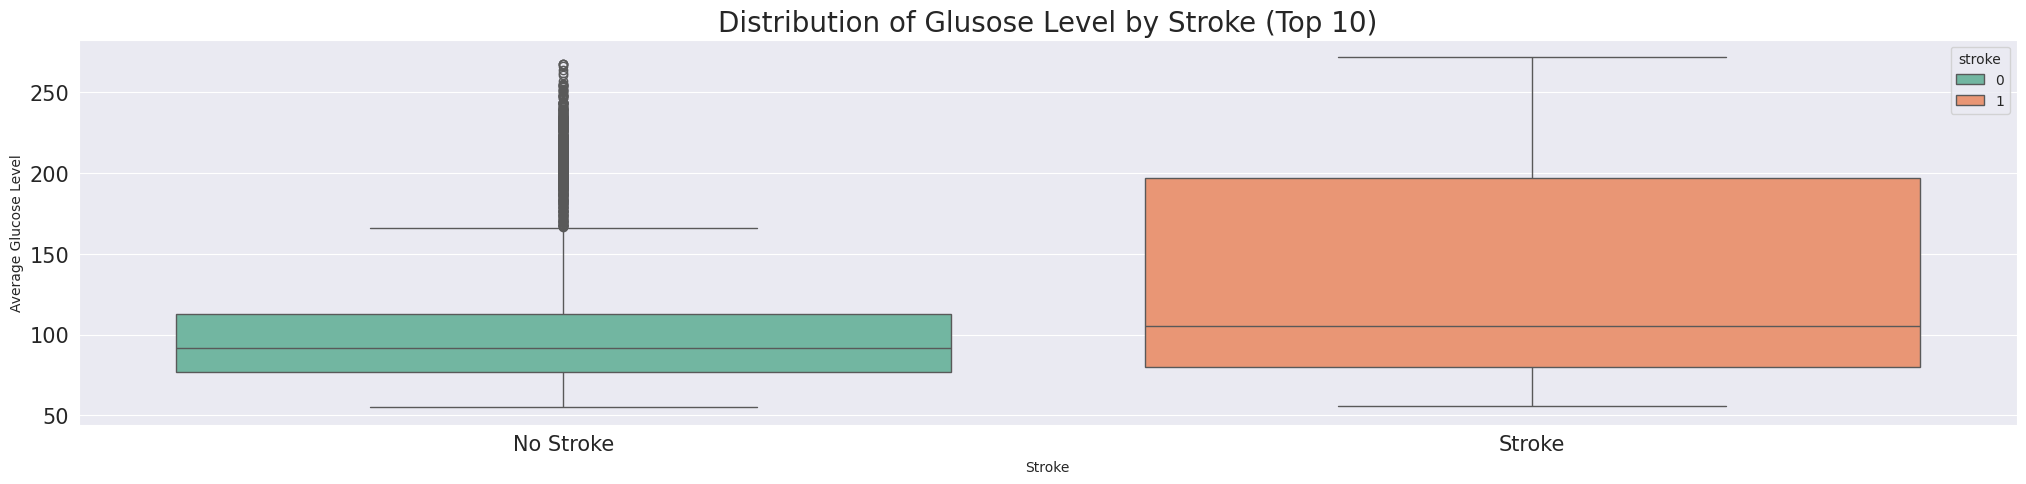

In [64]:
sns.set_style("darkgrid")

fig, axes = plt.subplots(1, 1, sharey=True)

sns.boxplot(data=data, x="stroke", y="avg_glucose_level", hue="stroke", palette="Set2", ax=axes)

plt.tick_params(labelsize=15)
plt.title("Distribution of Glusose Level by Stroke (Top 10)", fontsize=20)
plt.xlabel("Stroke", fontsize=10)
plt.ylabel("Average Glucose Level", fontsize=10)
plt.xticks([0, 1], ['No Stroke', 'Stroke'])

plt.show()

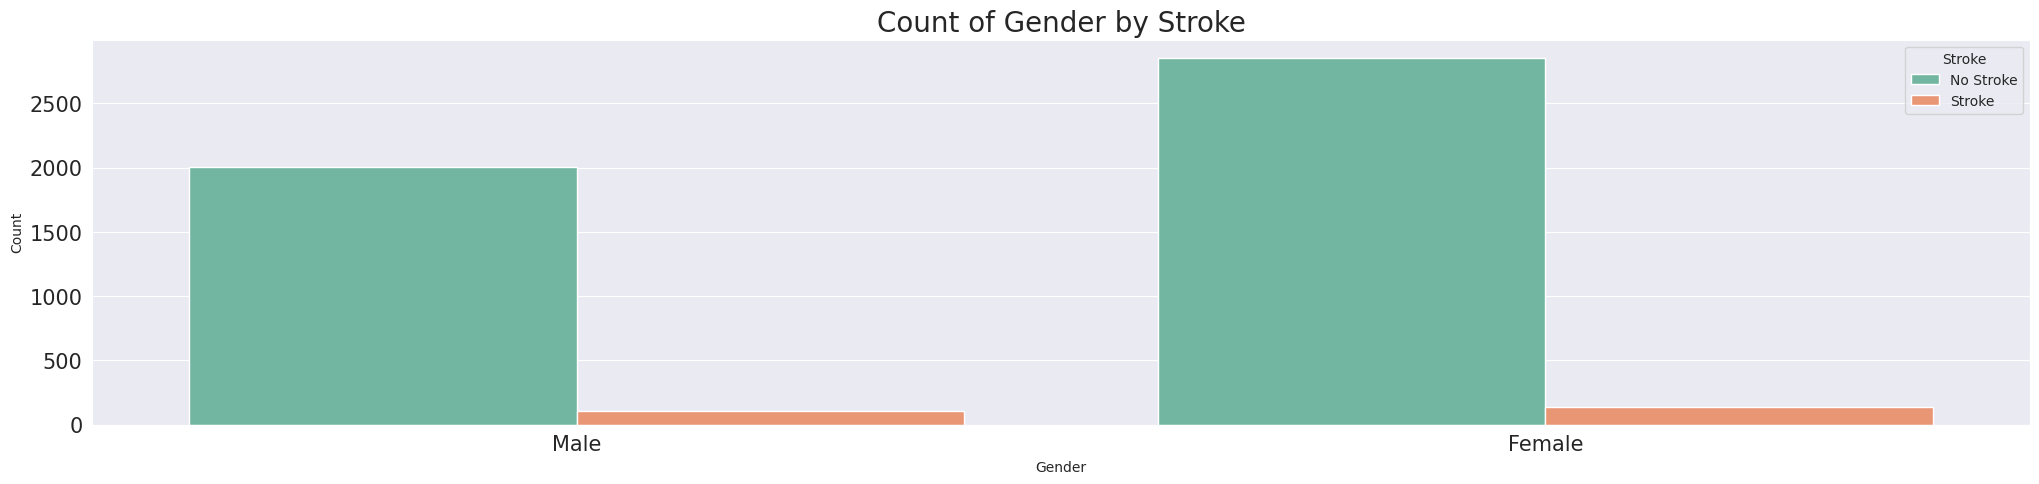

In [65]:
sns.set_style('darkgrid')

fig, axes = plt.subplots(1, 1, sharey=True)

sns.countplot(data=data, x="gender", hue="stroke", palette="Set2", ax=axes)

plt.tick_params(labelsize=15)
plt.title("Count of Gender by Stroke", fontsize=20)
plt.xlabel("Gender", fontsize=10)
plt.ylabel("Count", fontsize=10)
handles, labels = axes.get_legend_handles_labels()
axes.legend(handles, ['No Stroke', 'Stroke'], title="Stroke")

plt.show()

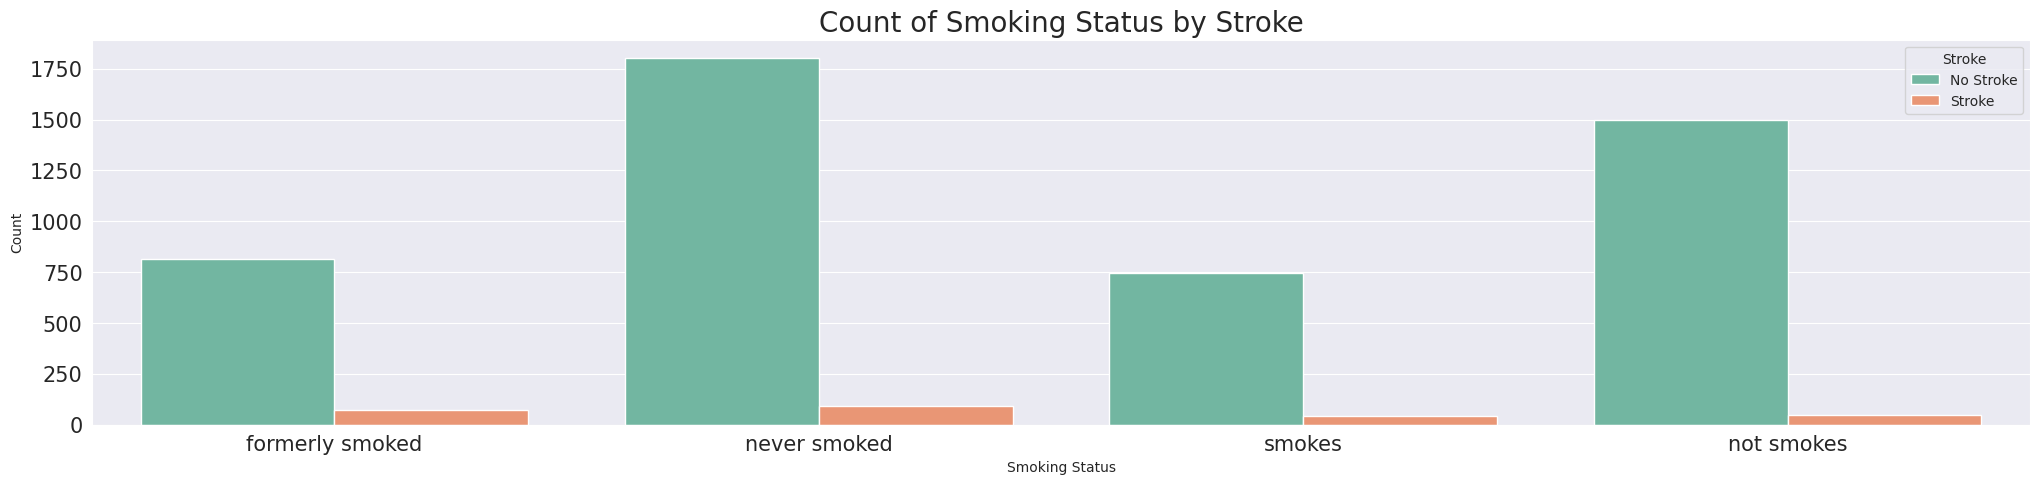

In [66]:
sns.set_style("darkgrid")

fig, axes = plt.subplots(1, 1, sharey=True)

sns.countplot(data=data, x='smoking_status', hue='stroke', palette="Set2", ax=axes)

plt.tick_params(labelsize=15)
plt.title("Count of Smoking Status by Stroke", fontsize=20)
plt.xlabel("Smoking Status", fontsize=10)
plt.ylabel("Count", fontsize=10)
handles, labels = axes.get_legend_handles_labels()
axes.legend(handles, ['No Stroke', 'Stroke'], title='Stroke')

plt.show()

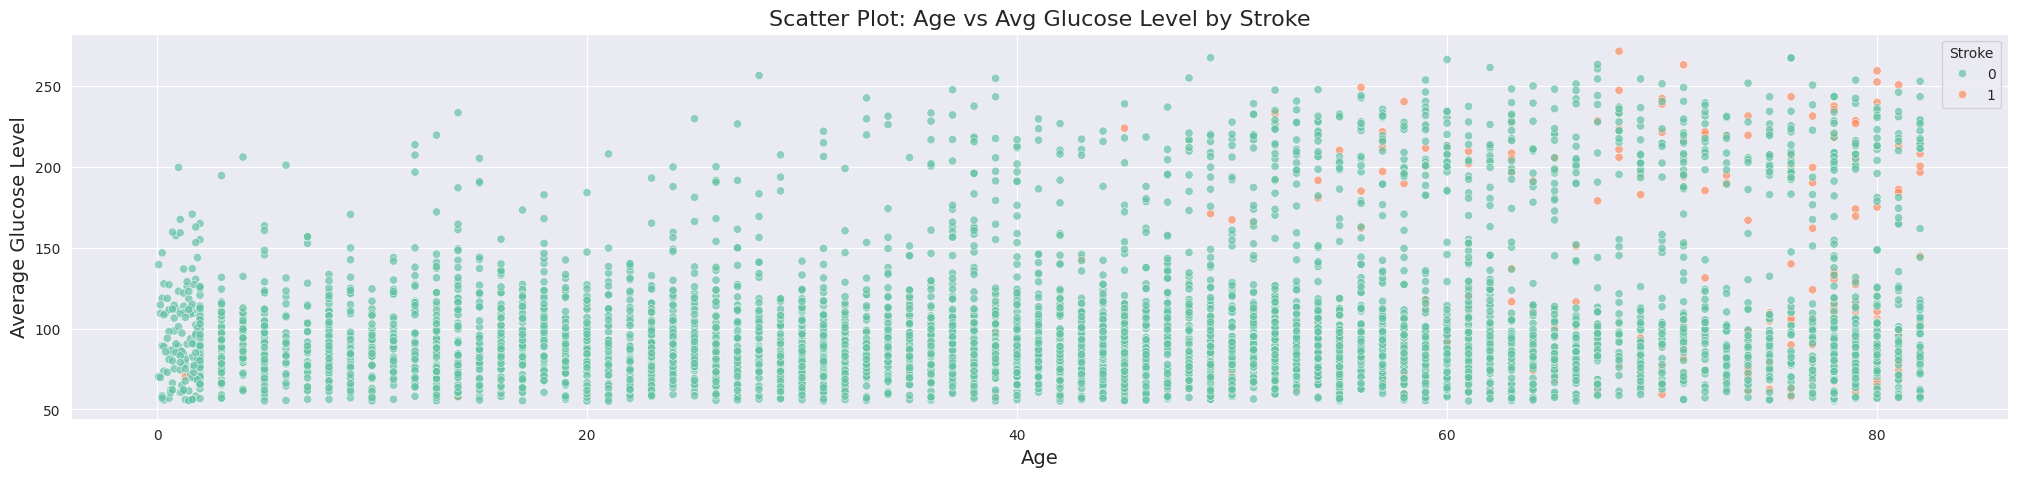

In [67]:
sns.set_style("darkgrid")

fig, axes = plt.subplots(1, 1, sharey=True)

sns.scatterplot(data=data, x="age", y="avg_glucose_level", hue="stroke", palette="Set2", alpha=0.7)

plt.title("Scatter Plot: Age vs Avg Glucose Level by Stroke", fontsize=16)
plt.xlabel("Age", fontsize=14)
plt.ylabel("Average Glucose Level", fontsize=14)
plt.legend(title="Stroke")

plt.show()

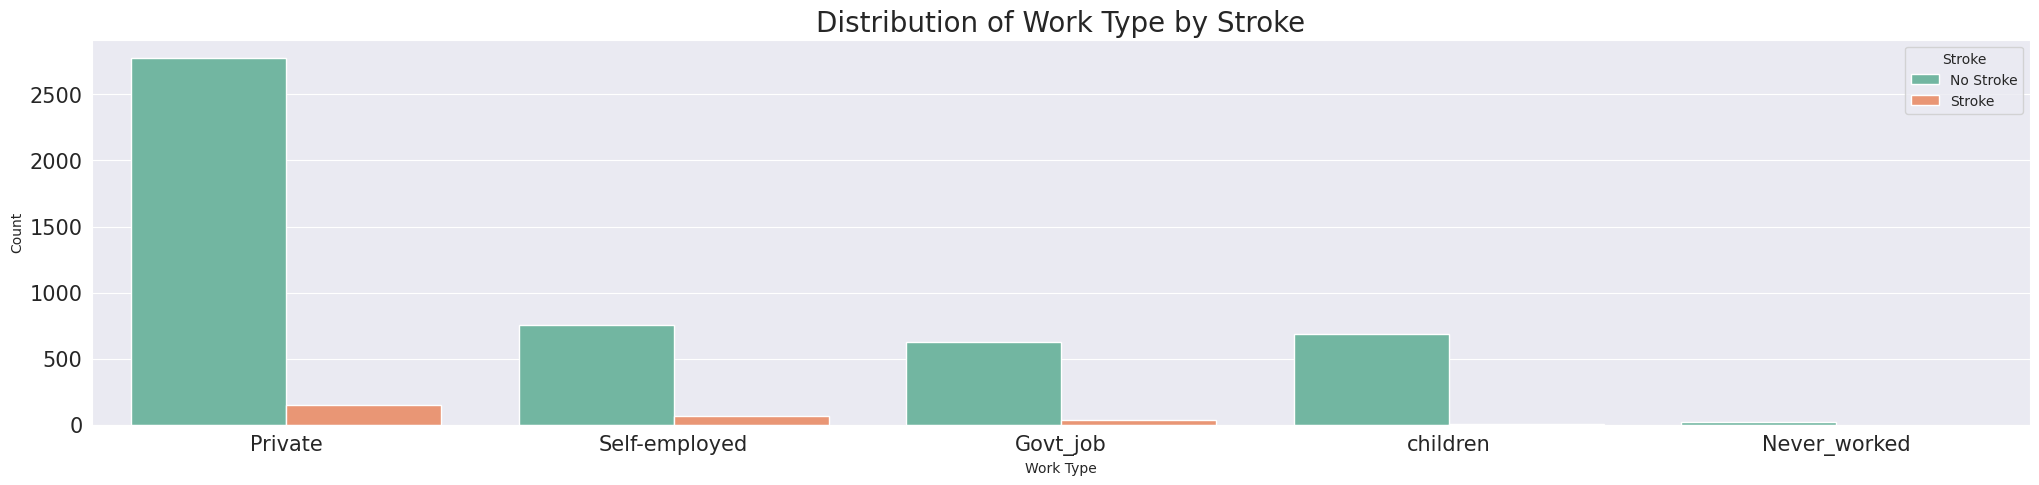

In [68]:
sns.set_style("darkgrid")

fig, axes = plt.subplots(1, 1, sharey=True)

sns.countplot(data=data, x='work_type', hue='stroke', palette="Set2", ax=axes)

plt.tick_params(labelsize=15)
plt.title("Distribution of Work Type by Stroke", fontsize=20)
plt.xlabel("Work Type", fontsize=10)
plt.ylabel("Count", fontsize=10)
handles, labels = axes.get_legend_handles_labels()
axes.legend(handles, ['No Stroke', 'Stroke'], title='Stroke')

plt.show()

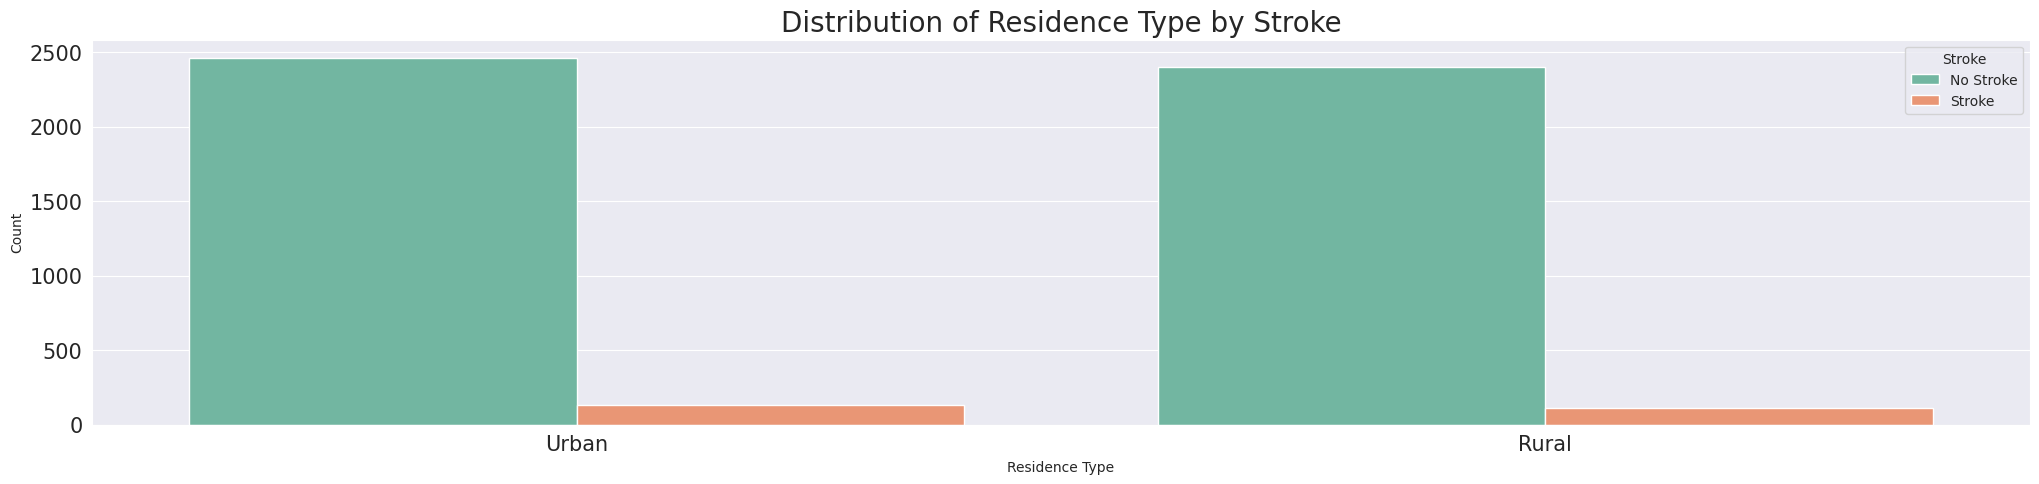

In [69]:
sns.set_style("darkgrid")

fig, axes = plt.subplots(1, 1, sharey=True)

sns.countplot(data=data, x='Residence_type', hue='stroke', palette="Set2", ax=axes)

plt.tick_params(labelsize=15)
plt.title("Distribution of Residence Type by Stroke", fontsize=20)
plt.xlabel("Residence Type", fontsize=10)
plt.ylabel("Count", fontsize=10)
handles, labels = axes.get_legend_handles_labels()
axes.legend(handles, ['No Stroke', 'Stroke'], title='Stroke')

plt.show()

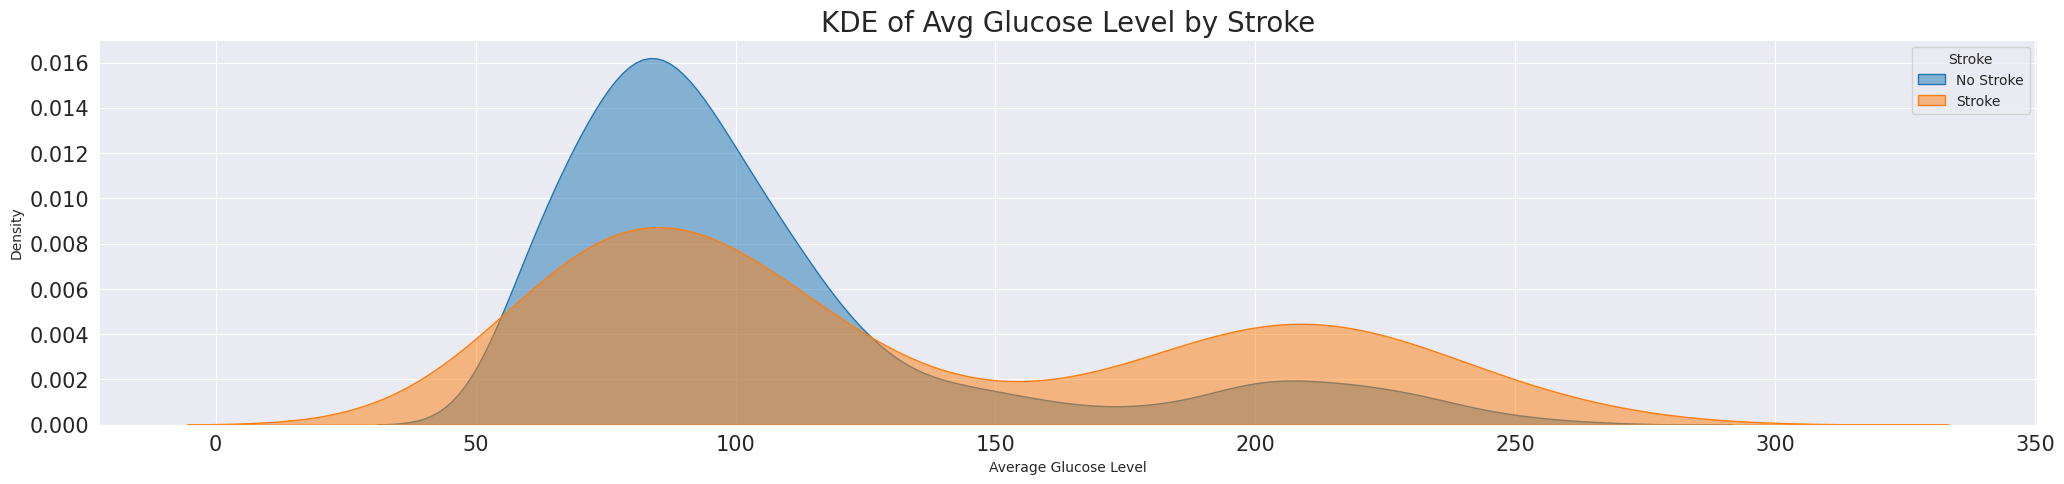

In [70]:
sns.set_style("darkgrid")

fig, axes = plt.subplots(1, 1, sharey=True)

sns.kdeplot(data=data[data['stroke'] == 0], x='avg_glucose_level', label="No Stroke", fill=True, alpha=0.5, ax=axes)
sns.kdeplot(data=data[data['stroke'] == 1], x='avg_glucose_level', label="Stroke", fill=True, alpha=0.5, ax=axes)

plt.tick_params(labelsize=15)
plt.title("KDE of Avg Glucose Level by Stroke", fontsize=20)
plt.xlabel("Average Glucose Level", fontsize=10)
plt.ylabel("Density", fontsize=10)
handles, labels = axes.get_legend_handles_labels()
axes.legend(handles, ['No Stroke', 'Stroke'], title='Stroke')

plt.show()

In [71]:
data['gender'] = data['gender'].map({"Male":1, "Female":0})
data['ever_married'] = data['ever_married'].map({"Yes":1, "No":0})
data['Residence_type'] = data['Residence_type'].map({"Urban":1, "Rural":0})

In [ ]:
data = pd.get_dummies(data, columns=['work_type', 'smoking_status'], drop_first=True)